In [1]:
%matplotlib inline

# Dependencies

import pandas as pd
import json
from pathlib import Path
from py_scripts.functions import Master_NC_Dataframe
from py_scripts.functions import Category_df
from py_scripts.functions import column_list
from py_scripts.functions import data_categories
import matplotlib.pyplot as plt
import seaborn as sns
print(Master_NC_Dataframe.head())
Category_df


             County  year  Active Dentists  Active Primary Care Physicians  \
0   Alamance County  2020             70.0                            96.0   
1  Alexander County  2020              5.0                             8.0   
2  Alleghany County  2020              2.0                             7.0   
3      Anson County  2020              3.0                             7.0   
4       Ashe County  2020              8.0                            15.0   

   Beds in General Hospitals  Deaths by Injury or Violence  Divorces  \
0                      182.0                         185.0     539.0   
1                       25.0                          38.0      52.0   
2                       41.0                          15.0      40.0   
3                       15.0                          31.0      66.0   
4                       76.0                          23.0      78.0   

   General Hospital Discharges  Infant Deaths  \
0                      12498.0           11.0   


,per_1000,not_per_1000
0,Healthcare Personnel and Facilities,Healthcare Personnel and Facilities
1,Female_Other_Age,Birth and Death Statistics
2,Female_White_Age,Life Events and Family Planning
3,Male_White_Age,Income and Wages
4,Male_Other_Age,Employment and Unemployment
5,Birth and Death Statistics,Poverty and Welfare
6,Life Events and Family Planning,Education
7,Income and Wages,Geographic and Census Data
8,Employment and Unemployment,Welfare and Social Security
9,Poverty and Welfare,NaN


In [2]:
#example replacement for relevant columns
print("The below can be used to reference columns with in the nested dictionary data_categories")
print(data_categories['per_1000']['Education'])

The below can be used to reference columns with in the nested dictionary data_categories
['People (<High School)', "Bachelor's Degree or Higher Am. Indian Alaska Native Age 25 Up", 'Black Age 25 Up w/Elementary School Education or Less', 'College Enrollment', 'College Graduates Age 25 Up', 'Community College Enrollment', 'Elementary School Education or Less Age 25 Up', 'Enrollment in Home Schools', 'High School Enrollment', 'High School Graduates (incl. Equivalency) Am. Indian Alaska Native Age 25 Up', 'High School Graduates Age 25 Up', 'High School Graduates Black Age 25 Up', 'High School Graduates White Age 25 Up', 'Kindergarten and Elementary School Enrollment', 'Less Than 5 Years of Elementary School Age 25 Up', 'Less Than High School Diploma Am. Indian Alaska Native Age 25 Up', 'Nonpublic School Enrollment', 'Nursery School Enrollment', 'Preprimary or Kindergarten School Enrollment', 'Private College Enrollment', 'Public College Enrollment', 'Public High School Dropouts', 'Public 

In [3]:
# Create a new dataframe which is a subset of the Master DataFrame containing relevant columns for statistical analysis.

relevant_columns = [
    "County",
    "year",
    "Active Dentists",
    "Active Primary Care Physicians",
    "Beds in General Hospitals",
    "Infant Deaths",
    "Divorces",
    "Low-Weight Births Under 2500 Grams",
    "Persons Served in Area Mental Health Programs",
    "Pregnancies for Females 15-19",
    "Pregnancies for Females of All Ages",
    "Registered Nurses",
    "Reported Abortions",
    "Resident Deaths",
    "Resident Live Births",
    "Estimated Median Family Income(HUD)",
    "Families in Poverty",
    "Families in Poverty with Related Children",
    "Persons in Poverty",
    "People (<High School)",
    "Percent Below Poverty",
    "People (Below Poverty)",
    "Percent Unemployed",
    "People (Unemployed)",
    "Population (Census/Estimate/Projection)",
    "Population Density (Persons per Square Mile)",
    "Black Population",
    "Black Persons in Poverty",
    "death_per_1000_infant_death",
    "White Persons in Poverty",
    "Hispanic Persons in Poverty"

]
relevant_statistics_df = Master_NC_Dataframe[relevant_columns]

In [10]:
# Convert certain columns to per 1000 counts.

per_thousand_df = Master_NC_Dataframe[data_categories['not_per_1000']['Geographic and Census Data'] + ['death_per_1000_infant_death'] + data_categories['per_1000']['Birth and Death Statistics'] + data_categories['per_1000']['Education'] + data_categories['per_1000']['Employment and Unemployment'] + data_categories['per_1000']['Female_Other_Age'] + data_categories['per_1000']['Female_White_Age'] + data_categories['per_1000']['Healthcare Personnel and Facilities'] + data_categories['per_1000']['Income and Wages'] + data_categories['per_1000']['Life Events and Family Planning'] + data_categories['per_1000']['Male_Other_Age'] + data_categories['per_1000']['Male_White_Age'] + data_categories['per_1000']['Poverty and Welfare'] + data_categories['per_1000']['Welfare and Social Security']]

# Columns to convert to per 1000 counts.
per_thousand_columns = [
    "Active Dentists",
    "Active Primary Care Physicians",
    "Beds in General Hospitals",
    "Divorces",
    "Low-Weight Births Under 2500 Grams",
    "Persons Served in Area Mental Health Programs",
    "Pregnancies for Females 15-19",
    "Pregnancies for Females of All Ages",
    "Registered Nurses",
    "Reported Abortions",
    "Resident Deaths",
    "Resident Live Births",
    "Families in Poverty",
    "Families in Poverty with Related Children",
    "Persons in Poverty",
    "People (<High School)",
    "People (Below Poverty)",
    "People (Unemployed)",
    "Black Population",
    "Black Persons in Poverty",
    "White Persons in Poverty",
    "Hispanic Persons in Poverty"

]
per_thousand_columns = data_categories['per_1000']['Education']
for column in per_thousand_columns:
    per_thousand_df[column] = per_thousand_df[column] / per_thousand_df["Population (Census/Estimate/Projection)"] * 1000

# per_thousand_df = per_thousand_df[["County"] + ["year"] + ["death_per_1000_infant_death"]+ ["Population (Census/Estimate/Projection)"] + per_thousand_columns]
per_thousand_df = per_thousand_df[["County"] + ["death_per_1000_infant_death"]+ per_thousand_columns]



C:\Users\raymm\AppData\Local\Temp\ipykernel_31228\1982704927.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_thousand_df[column] = per_thousand_df[column] / per_thousand_df["Population (Census/Estimate/Projection)"] * 1000


C:\Users\raymm\AppData\Local\Temp\ipykernel_31228\2648961647.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(per_thousand_df_no_zeros.corr(), vmin=-1, vmax = 1, annot=True,  cmap=sns.diverging_palette(0, 220, s=80, l=40, as_cmap = True))


<Axes: >

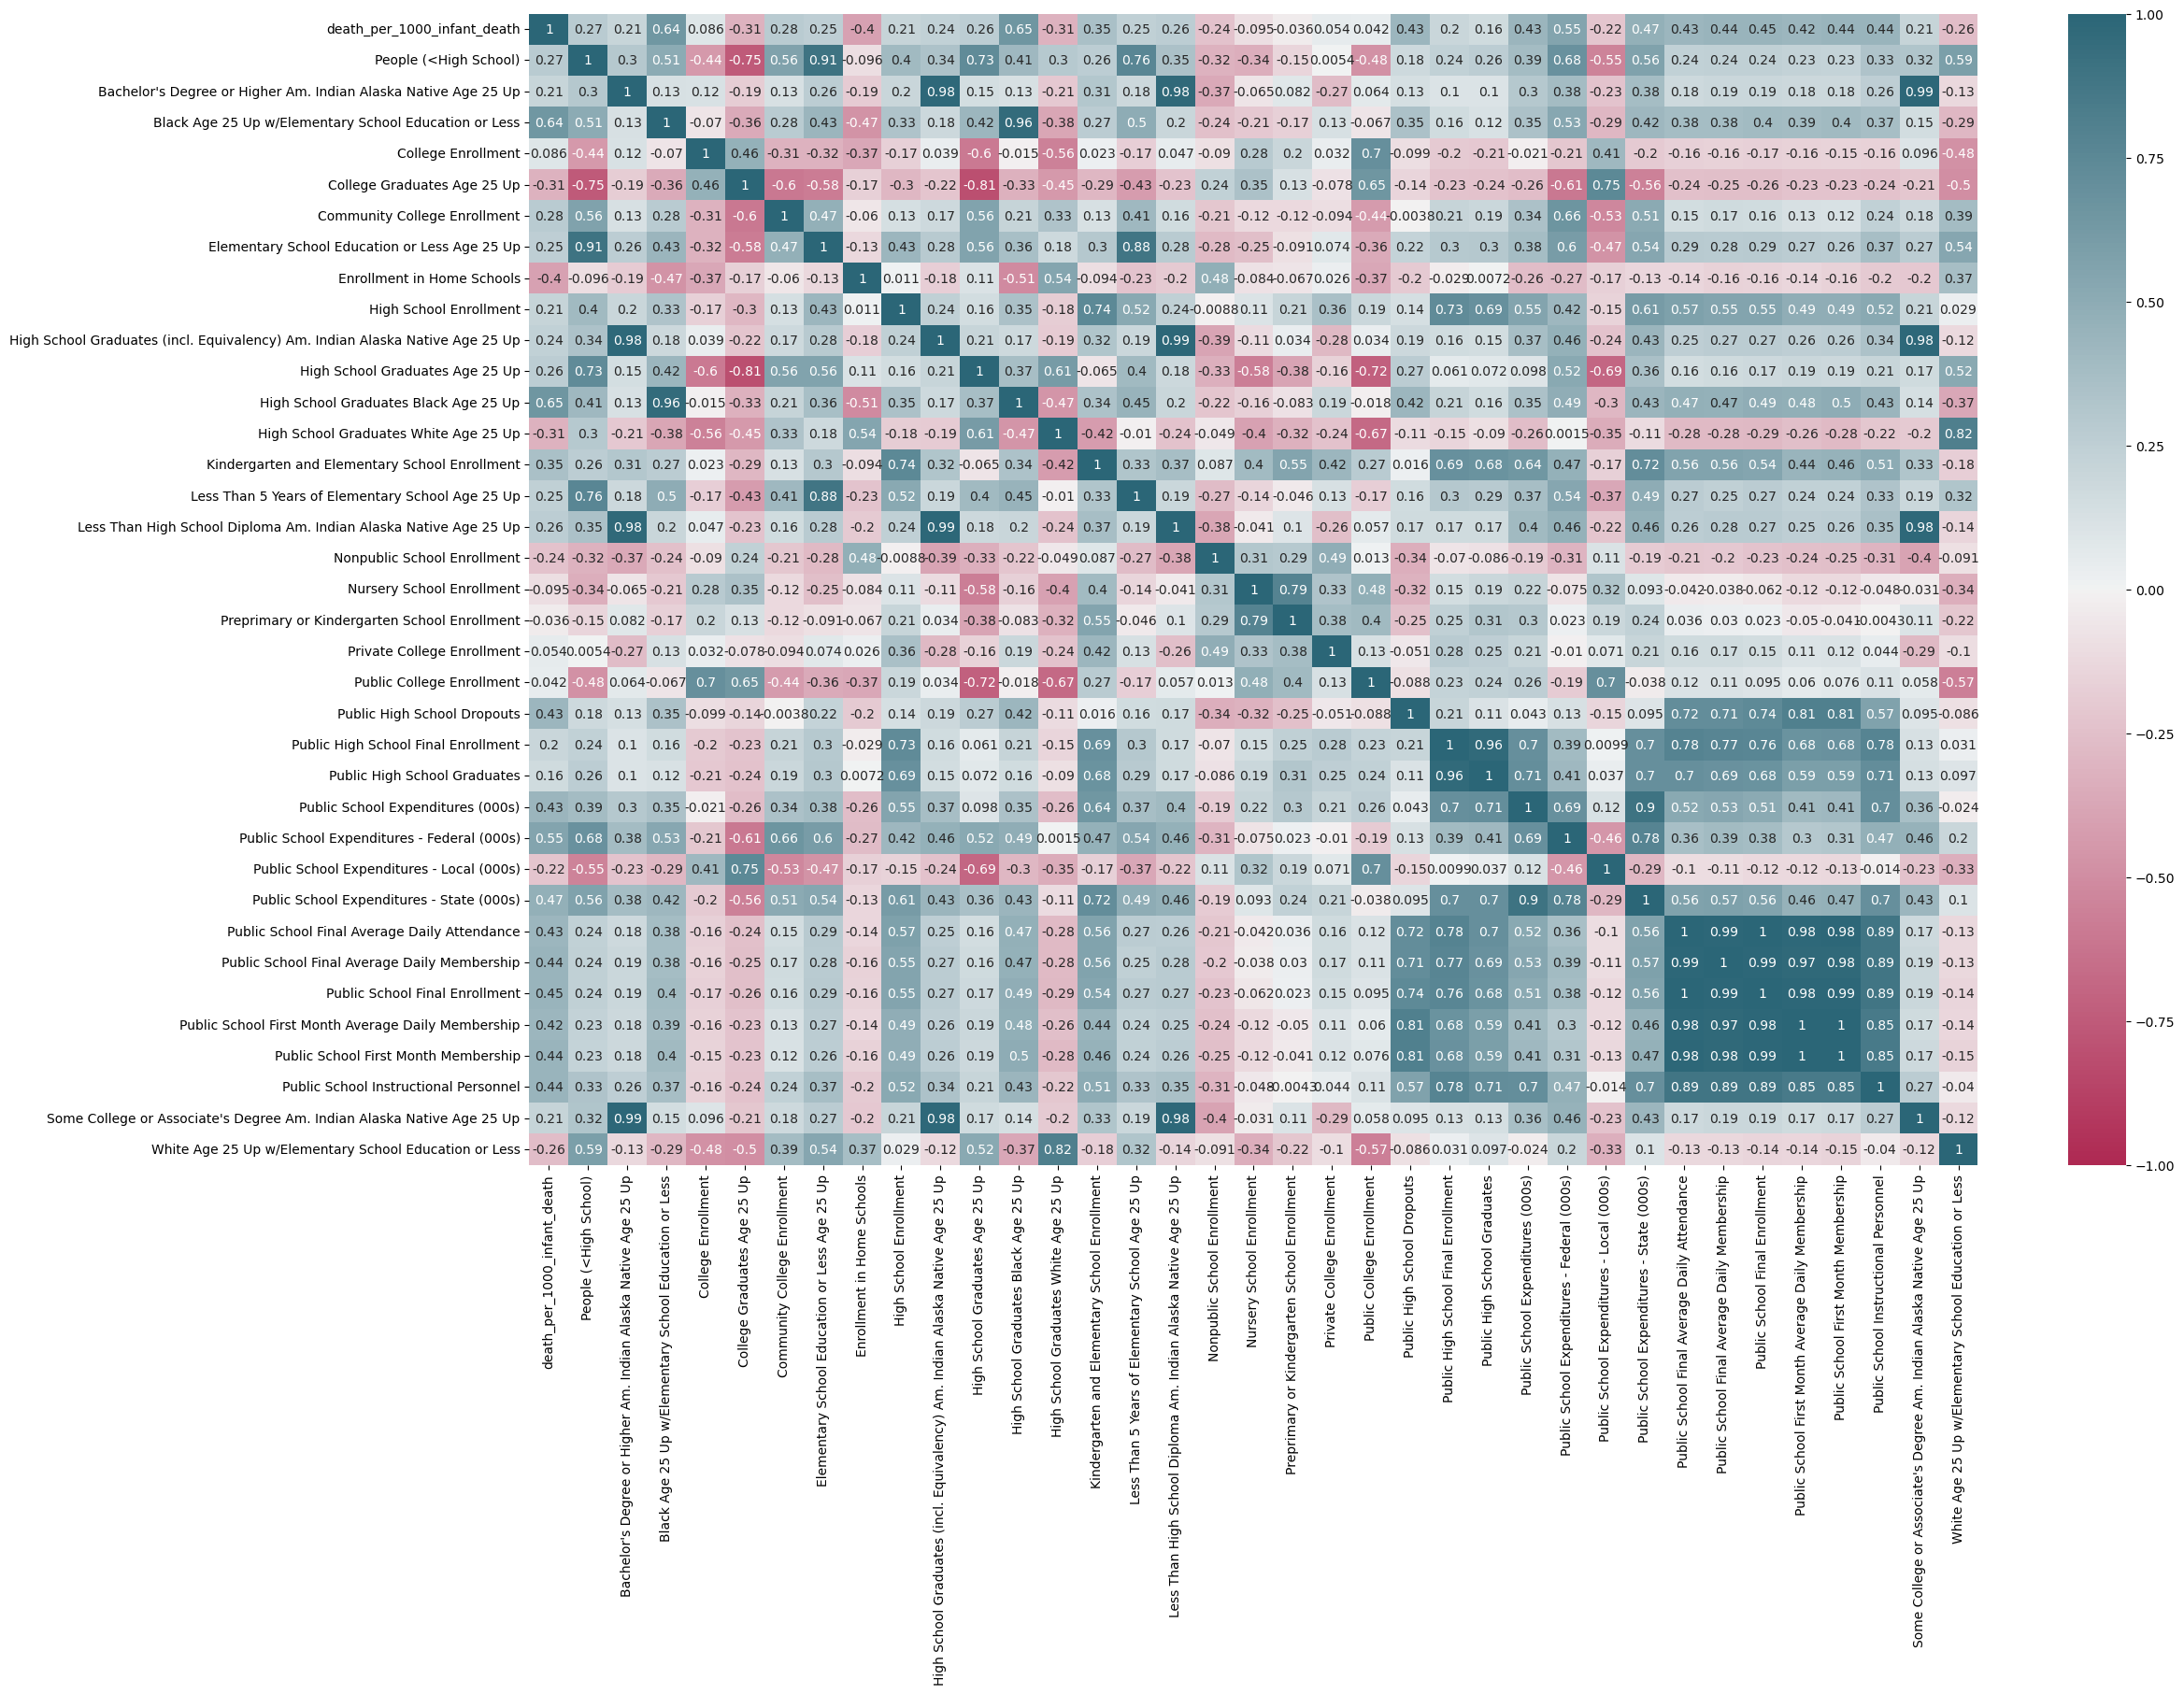

In [15]:
per_thousand_df_no_zeros = per_thousand_df[(per_thousand_df != 0 ).all(axis=1)]

plt.figure(figsize=(25,16))
sns.heatmap(per_thousand_df_no_zeros.corr(), vmin=-1, vmax = 1, annot=True,  cmap=sns.diverging_palette(0, 220, s=80, l=40, as_cmap = True))
